In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from project1 import defs

dim_reduced_train_features: pd.DataFrame = defs.load_asset_value("dim_reduced_train_features")
train_root_labels: pd.DataFrame = defs.load_asset_value("train_root_labels")
dim_reduced_test_features: pd.DataFrame = defs.load_asset_value("dim_reduced_test_features")
test_root_labels: pd.DataFrame = defs.load_asset_value("test_root_labels")

2024-04-12 11:58:04 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/dim_reduced_train_features using PickledObjectFilesystemIOManager...
2024-04-12 11:58:04 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/train_root_labels using PickledObjectFilesystemIOManager...
2024-04-12 11:58:04 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/dim_reduced_test_features using PickledObjectFilesystemIOManager...
2024-04-12 11:58:04 -0700 - dagster - DEBUG - system - Loading file from: /home/maguire/ucla/ece219/project1/project1/../data/test_root_labels using PickledObjectFilesystemIOManager...


In [2]:
from sklearn.svm import SVC

svm_hard_1000 = SVC(C=1000, probability=True, kernel="linear")
svm_hard_100000 = SVC(C=100000, probability=True, kernel="linear")
svm_soft_0001 = SVC(C=0.0001, probability=True, kernel="linear")

In [3]:
svm_hard_1000.fit(dim_reduced_train_features, train_root_labels)
svm_hard_100000.fit(dim_reduced_train_features, train_root_labels)
svm_soft_0001.fit(dim_reduced_train_features, train_root_labels)

SVC(C=0.0001, kernel='linear', probability=True)

In [4]:
from project1.utils.MetricsAnalyzer import MetricsAnalyzer

ROC plot: 


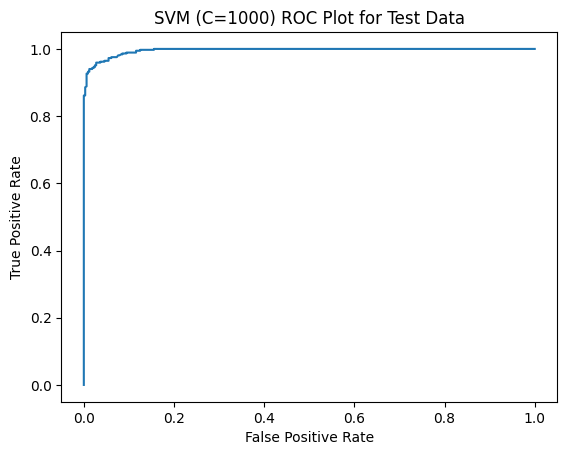

Confusion Matrix: 
[[317  11]
 [ 15 353]]
Accuracy Score: 
0.9626436781609196
Recall Score: 
0.9592391304347826
Precision Score: 
0.9697802197802198
F1 Score: 
0.9644808743169399


In [5]:
g1000_test_metrics = MetricsAnalyzer(svm_hard_1000, dim_reduced_test_features, test_root_labels, pos_label="sports")
g1000_test_metrics.print_all(plot_title="SVM (C=1000) ROC Plot for Test Data")

ROC plot: 


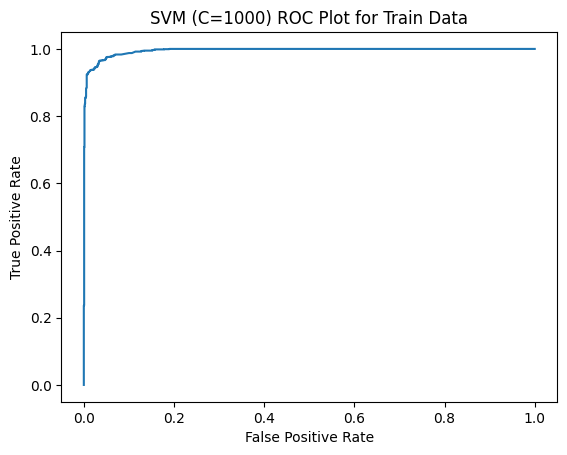

Confusion Matrix: 
[[1351   47]
 [  51 1331]]
Accuracy Score: 
0.9647482014388489
Recall Score: 
0.9630969609261939
Precision Score: 
0.9658925979680697
F1 Score: 
0.9644927536231884


In [6]:
#Make note the following metrics are redone on the training data just out of curiosity, these metrics should not be used to actually qualify the model
g1000_train_metrics = MetricsAnalyzer(svm_hard_1000, dim_reduced_train_features, train_root_labels, pos_label="sports")
g1000_train_metrics.print_all(plot_title="SVM (C=1000) ROC Plot for Train Data")

ROC plot: 


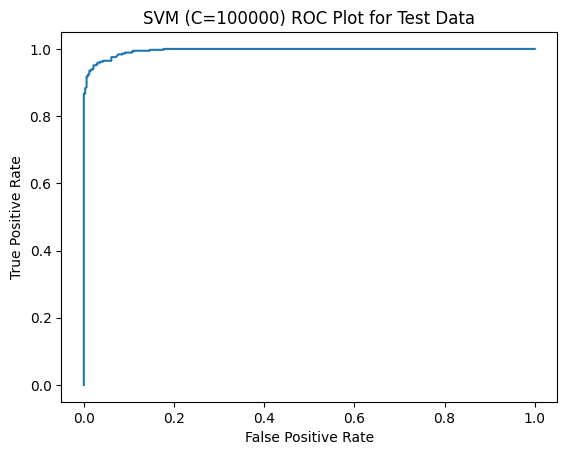

Confusion Matrix: 
[[318  10]
 [ 15 353]]
Accuracy Score: 
0.9640804597701149
Recall Score: 
0.9592391304347826
Precision Score: 
0.9724517906336089
F1 Score: 
0.9658002735978112


In [7]:
g100000_test_metrics = MetricsAnalyzer(svm_hard_100000, dim_reduced_test_features, test_root_labels, pos_label="sports")
g100000_test_metrics.print_all(plot_title="SVM (C=100000) ROC Plot for Test Data")

ROC plot: 


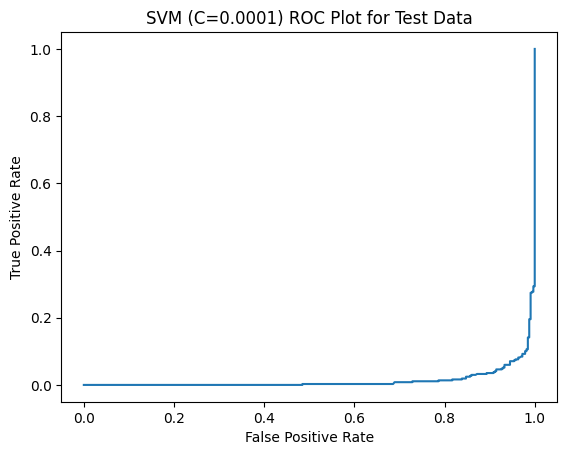

Confusion Matrix: 
[[328   0]
 [368   0]]
Accuracy Score: 
0.47126436781609193
Recall Score: 
0.0
Precision Score: 
0.0
F1 Score: 
0.0


/home/maguire/ucla/ece219/project1/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
g0001_test_metrics = MetricsAnalyzer(svm_soft_0001, dim_reduced_test_features, test_root_labels, pos_label="sports")
g0001_test_metrics.print_all(plot_title="SVM (C=0.0001) ROC Plot for Test Data")

In [9]:
from sklearn.model_selection import GridSearchCV

grid = {
    "C": [10 ** k for k in range(-3, 7)]
}

#GridSearch with cv=5 automatically uses 5-fold cross validation
clf = GridSearchCV(SVC(probability=True), grid, scoring="accuracy", cv=5, n_jobs=2)
clf.fit(dim_reduced_train_features, train_root_labels)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000]},
             scoring='accuracy')

In [10]:
clf.best_estimator_

SVC(C=100, probability=True)

In [11]:
clf.best_score_

0.958273381294964

ROC plot: 


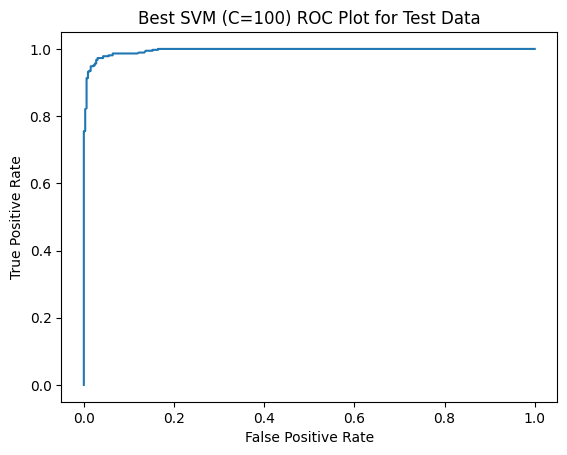

Confusion Matrix: 
[[319   9]
 [ 15 353]]
Accuracy Score: 
0.9655172413793104
Recall Score: 
0.9592391304347826
Precision Score: 
0.9751381215469613
F1 Score: 
0.9671232876712329


In [13]:
best_test_metrics = MetricsAnalyzer(clf, dim_reduced_test_features, test_root_labels, pos_label="sports")
best_test_metrics.print_all(plot_title="Best SVM (C=100) ROC Plot for Test Data")